<a href="https://colab.research.google.com/github/siddharthchd/Tensorflow_Developer/blob/main/lessons/horse_human_lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-10-26 05:40:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 2607:f8b0:400e:c09::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   193MB/s    in 0.7s    

2020-10-26 05:40:27 (193 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import os 
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [3]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse04-9.png', 'horse19-9.png', 'horse11-4.png', 'horse28-1.png', 'horse06-9.png', 'horse14-6.png', 'horse09-1.png', 'horse44-7.png', 'horse44-8.png', 'horse45-6.png']
['human14-04.png', 'human07-25.png', 'human16-24.png', 'human15-02.png', 'human15-29.png', 'human16-02.png', 'human17-11.png', 'human15-06.png', 'human07-30.png', 'human09-21.png']


In [5]:
print('Total training horse images : {}'.format(len(os.listdir(train_horse_dir))))
print('Total training human images : {}'.format(len(os.listdir(train_human_dir))))

Total training horse images : 500
Total training human images : 527


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we will output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images 
pic_index = 0

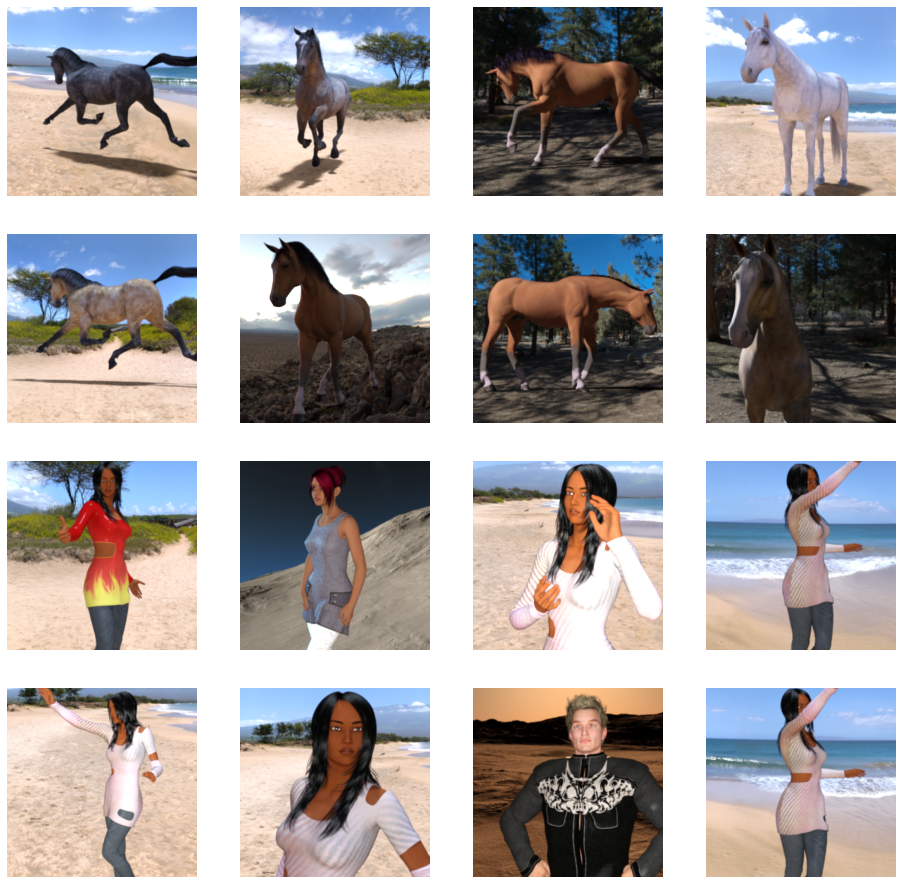

In [7]:
# Displaying a batch of 8 horse and 8 human pictures. Rerunning the cell will give a fresh batch each time
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index - 8 : pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index - 8 : pic_index]]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    
    # Set up subplot
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
                                    # Input shape is the desired size of the image 300x300 with 3 bytes color
                                    # This is the first convolution
                                    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The second convolution
                                    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # the third convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'), 
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The fourth convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The fifth convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Flatten the results to feed into a DNN
                                    tf.keras.layers.Flatten(),
                                    # 512 neuron hidden layer
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr = 0.001), metrics = ['accuracy'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale = 1 / 255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',     # This is the source directory for training images
    target_size = (300, 300),   # All images will be resized to 150x150
    batch_size = 128, 
    # Since we use binary_crossentropy los, we need binary labels
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 5s 632ms/step - loss: 0.8444 - accuracy: 0.5161
Epoch 2/15
8/8 [==============================] - 6s 720ms/step - loss: 0.6471 - accuracy: 0.6174
Epoch 3/15
8/8 [==============================] - 6s 723ms/step - loss: 1.0542 - accuracy: 0.6385
Epoch 4/15
8/8 [==============================] - 6s 729ms/step - loss: 0.3844 - accuracy: 0.8498
Epoch 5/15
8/8 [==============================] - 6s 716ms/step - loss: 0.5347 - accuracy: 0.8131
Epoch 6/15
8/8 [==============================] - 6s 711ms/step - loss: 0.2551 - accuracy: 0.9077
Epoch 7/15
8/8 [==============================] - 6s 812ms/step - loss: 0.2401 - accuracy: 0.9053
Epoch 8/15
8/8 [==============================] - 6s 725ms/step - loss: 0.2179 - accuracy: 0.9077
Epoch 9/15
8/8 [==============================] - 6s 812ms/step - loss: 0.1718 - accuracy: 0.9266
Epoch 10/15
8/8 [==============================] - 6s 721ms/step - loss: 0.1844 - accuracy: 0.9232
Epoch 11/15
8/8 [==

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size = (300, 300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size = 10)
    print(classes[0])
    if classes[0] > 0.5:
        print(fn + ' is a human')
    else:
        print(fn + ' is a horse')

Saving horse-test1.jpg to horse-test1.jpg
[1.6770449e-10]
horse-test1.jpg is a horse


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


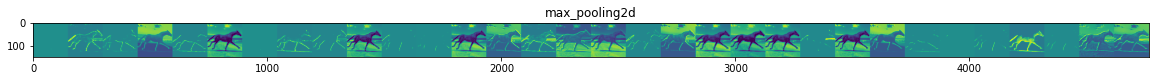

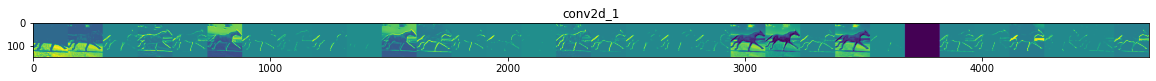

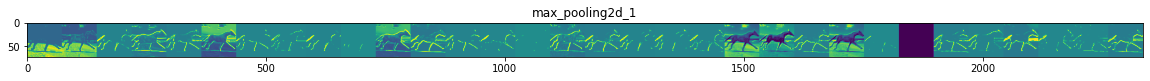

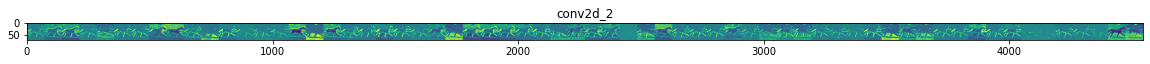

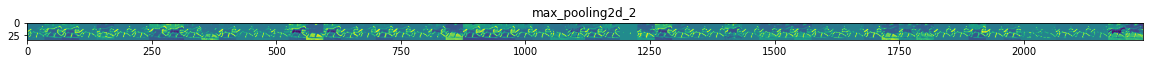

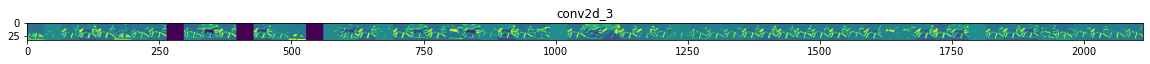

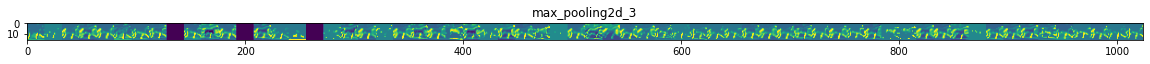

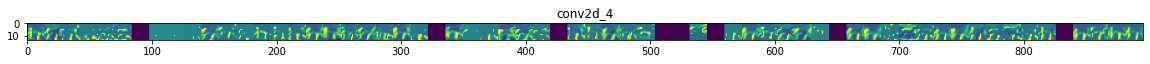

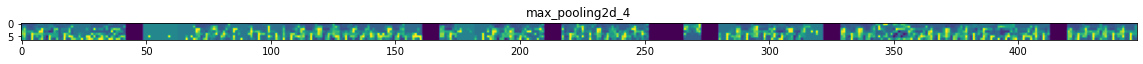

In [15]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')